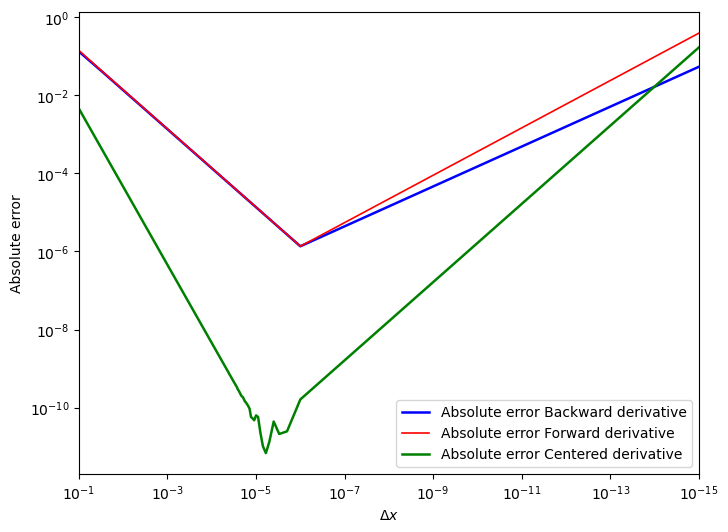

Forward min error   = 1.359e-06 at dx = 1.000e-06
Backward min error  = 1.359e-06 at dx = 1.000e-06
Centered min error  = 6.857e-12 at dx = 6.000e-06


In [3]:
import numpy as np
import matplotlib.pyplot as plt


# 1) Función y derivada exacta

def f(x):
    return np.exp(x)

def dfdx(x):
    return np.exp(x)


# 2) Derivadas numéricas
def forwardDerivative(f, x, dx):
    return (f(x + dx) - f(x)) / dx

def backwardDerivative(f, x, dx):
    return (f(x) - f(x - dx)) / dx

def centeredDerivative(f, x, dx):
    return (f(x + dx) - f(x - dx)) / (2.0 * dx)


# 3) Defino Parámetros

x = 1.0
dx_max = 1e-1
dx_min = 1e-15
dx = np.linspace(dx_min, dx_max, 100000)


# 4) Cálculo de errores

f_dfdx = forwardDerivative(f, x, dx)
b_dfdx = backwardDerivative(f, x, dx)
c_dfdx = centeredDerivative(f, x, dx)

true_val = dfdx(x)

abs_error_f = np.abs(true_val - f_dfdx)
abs_error_b = np.abs(true_val - b_dfdx)
abs_error_c = np.abs(true_val - c_dfdx)


plt.figure(figsize=(8, 6))

plt.loglog(dx, abs_error_b, 'b', lw=1.8, label='Absolute error Backward derivative')
plt.loglog(dx, abs_error_f, 'r', lw=1.2, label='Absolute error Forward derivative')
plt.loglog(dx, abs_error_c, 'g', lw=1.8, label='Absolute error Centered derivative')

plt.xlabel(r'$\Delta x$')
plt.ylabel('Absolute error')
plt.xlim(dx_max, dx_min)   # eje invertido
plt.legend()
plt.show()


# 6) ver mínimos
i_f = np.argmin(abs_error_f)
i_b = np.argmin(abs_error_b)
i_c = np.argmin(abs_error_c)

print(f"Forward min error   = {abs_error_f[i_f]:.3e} at dx = {dx[i_f]:.3e}")
print(f"Backward min error  = {abs_error_b[i_b]:.3e} at dx = {dx[i_b]:.3e}")
print(f"Centered min error  = {abs_error_c[i_c]:.3e} at dx = {dx[i_c]:.3e}")


<div style="background-color:#ffe6f0; padding:18px; border-radius:12px; border:1px solid #ffb3d1; color:#1a1a1a;">

<h3 style="color:#cc0066; margin-top:0;">🌸 Comportamiento del error – Derivada centrada</h3>

<p style="color:#1a1a1a; font-size:15px; margin:0 0 10px 0;">
Se ven unas “puntas” en la curva verde cuando Δx es muy pequeño. Esto no es que el método esté mal, sino que ya estamos entrando en un tema de precisión del computador.
</p>

<p style="color:#1a1a1a; font-size:15px; margin:0 0 10px 0;">
Cuando Δx es demasiado pequeño, f(x + h) y f(x − h) salen casi iguales, y al restarlos se pierde precisión. Luego, como además se divide por un número muy pequeño, ese pequeño error se amplifica.
</p>

<p style="color:#1a1a1a; font-size:15px; margin:0;">
Por eso la curva deja de ser suave y aparecen esas puntas. Básicamente, llega un punto donde el error ya no es del método sino del cálculo numérico.
</p>

</div>